In [1]:
from fraud import collectAllFeaturesBaseline
from fraud import calculate_mutual_information, visualize_mutual_information, addCombinations

df_fraud_aggregated = collectAllFeaturesBaseline() 

/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/fraud.py:35: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  self._frames[str(p)] = pd.read_csv(p)


           client_id  target  disrict  region  client_catg
0     train_Client_0     0.0       60     101           11
1     train_Client_1     0.0       69     107           11
2    train_Client_10     0.0       62     301           11
3   train_Client_100     0.0       69     105           11
4  train_Client_1000     0.0       62     303           11


/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/fraud.py:529: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merge_df['creation_date'] = pd.to_datetime(merge_df['creation_date'])


In [2]:
df_fraud_aggregated['target'].value_counts(normalize=True)

target
0.0    0.944159
1.0    0.055841
Name: proportion, dtype: float64

In [3]:
#df_fraud_mutual_info = calculate_mutual_information(df_fraud_aggregated, target_col="target", exclude_cols=["client_id", "target", 'region', 'disrict', 'client_catg'])
df_fraud_aggregated = addCombinations(df_fraud_aggregated)
df_fraud_mutual_info = calculate_mutual_information(df_fraud_aggregated, target_col="target", exclude_cols=["client_id", "target"])


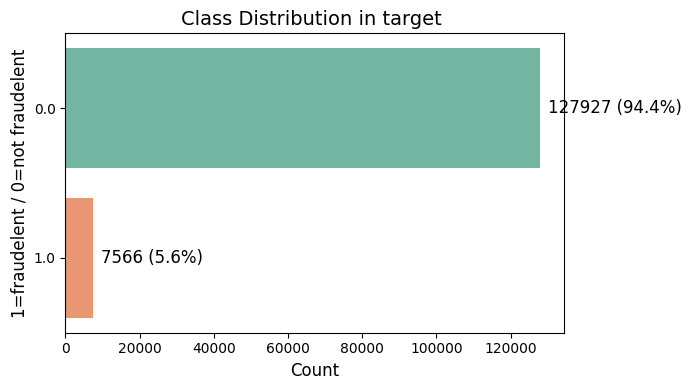

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Zielvariable
y = df_fraud_aggregated['target']

# Zählung und Prozentberechnung
counts = y.value_counts()
percent = y.value_counts(normalize=True) * 100

# Daten für Plot
plot_data = pd.DataFrame({
    'class': counts.index.astype(str),
    'count': counts.values,
    'percent': percent.values
})

# Plot
plt.figure(figsize=(7, 4))
ax = sns.barplot(y='class', x='count', data=plot_data, palette='Set2')

# Annotation je nach Klasse
for i, row in plot_data.iterrows():
    label = f"{int(row['count'])} ({row['percent']:.1f}%)"
    
    if row['class'] == '0':
        # Im Balken (links)
        ax.text(
            row['count'] * 0.5, i,
            label,
            ha='center', va='center', color='white', fontsize=12, fontweight='bold'
        )
    else:
        # Rechts neben dem Balken
        ax.text(
            row['count'] + 2000, i,
            label,
            ha='left', va='center', fontsize=12
        )

# Achsen und Layout
plt.title("Class Distribution in target ", fontsize=14)
plt.ylabel("1=fraudelent / 0=not fraudelent", fontsize=12)
plt.xlabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

In [5]:
df_fraud_mutual_info.head(50)


,Feature,MI_Score
0,f_t_client_catg_target_mean,0.034069
1,remarque_frequency,0.030374
2,client_catg,0.028639
3,f_combi1,0.027038
4,f_counter_number_nunique,0.027021
5,avg_remarque_length,0.020379
6,tarif_type,0.016935
7,f_combi2,0.012523
8,f_tarif_change_count,0.011661
9,disrict,0.010587


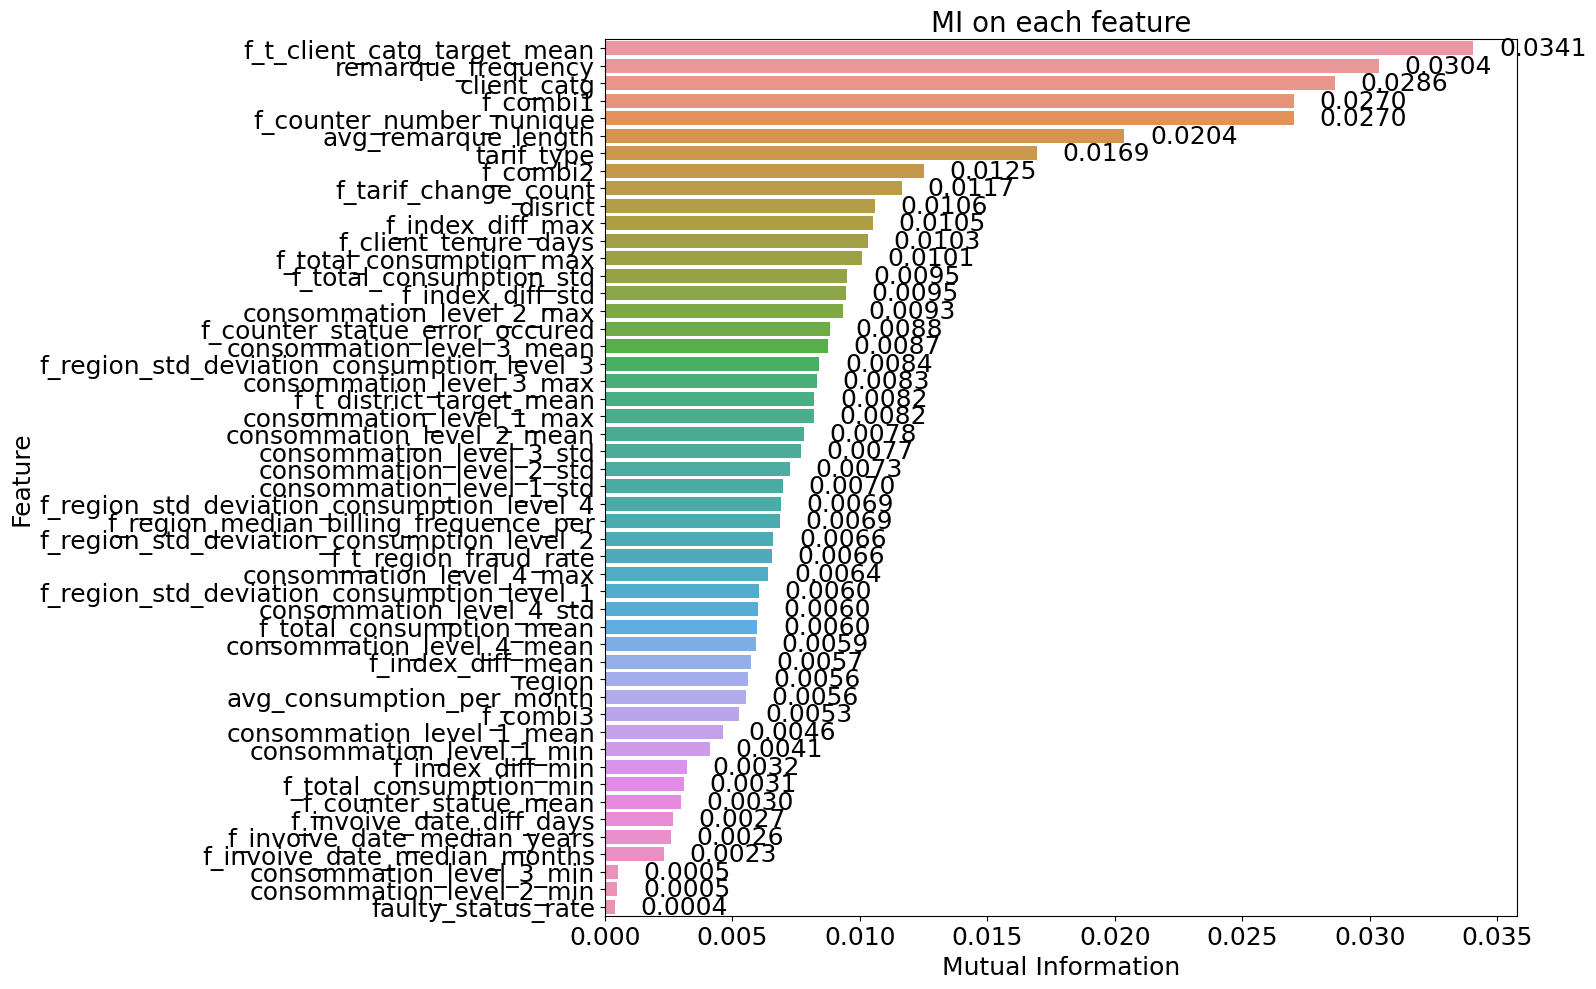

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
visualize_mutual_information(df_fraud_mutual_info, top_n=50)

In [7]:
# Save the mutual information DataFrame to a CSV file
df_fraud_mutual_info.to_csv("./data/mutual_information_fraud.csv", index=False)